In [ ]:
import requests
import zipfile
import io
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
#Question 1
#Directly using the URL to read the data as csv file.
#As we are using random function we set the seed value to 24 such that our random library functions generate consistent non changing outputs.
url = 'https://nrvis.com/download/data/labeled/DD21.zip'
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
    thezip.extractall('DD21')
edges_df = pd.read_csv('DD21/DD21.edges', header=None, names=['source', 'target'], sep=' ')
nodes_df = pd.read_csv('DD21/DD21.node_labels', header=None, names=['node', 'label'], sep=' ')
random.seed(24)

In [ ]:
#Defining the Graph using the edge dataframe and the node labels
G = nx.from_pandas_edgelist(edges_df, 'source', 'target')
nx.set_node_attributes(G, pd.Series(nodes_df.label.values, index=nodes_df.node).to_dict(), 'label')

In [ ]:
#Using the pre-defined function to calculate the number of nodes and number of edges in order to verify if dataset is accessed correctly.
#Computing the average degree by finding the sum of the degrees of each node and divide it by total number of nodes.
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
avg_deg=sum(dict(G.degree).values()) / G.number_of_nodes()
print(f"Average degree: {avg_deg}")

Number of nodes: 5748
Number of edges: 14267
Average degree: 4.964161447459986


In [ ]:
#Creating a sorted list based on the node degree in descending order.
degrees = dict(G.degree())
sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)

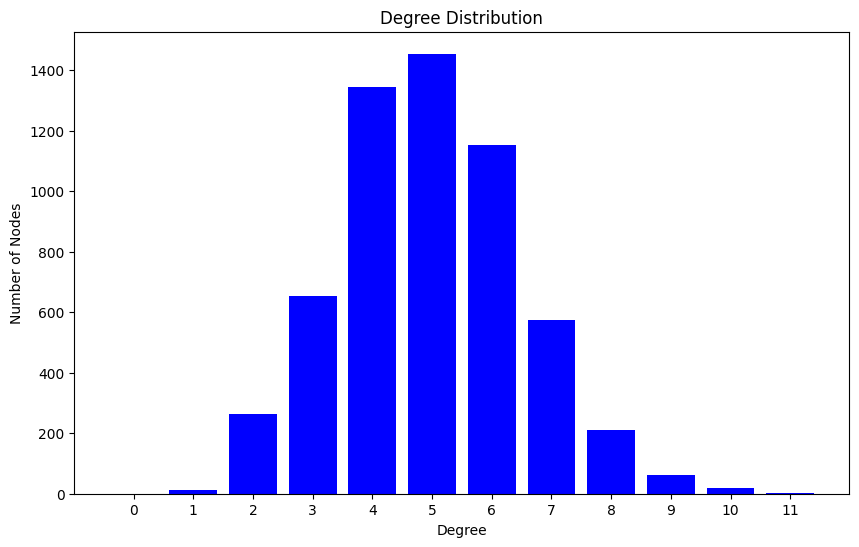

In [ ]:
#Question 2
#degree_sequence generates a sequence of corresponding degrees of each node
#using the numpy package we find the count of each degree(bin) and hence we get a degree distribution as a histogram plot.
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = np.bincount(degree_sequence)
deg = np.arange(len(degree_count))
plt.figure(figsize=(10, 6))
plt.bar(deg, degree_count, width=0.80, color='b')

plt.title("Degree Distribution")
plt.ylabel("Number of Nodes")
plt.xlabel("Degree")
plt.xticks(np.arange(0, max(degree_sequence)+1, step=1))
plt.show()

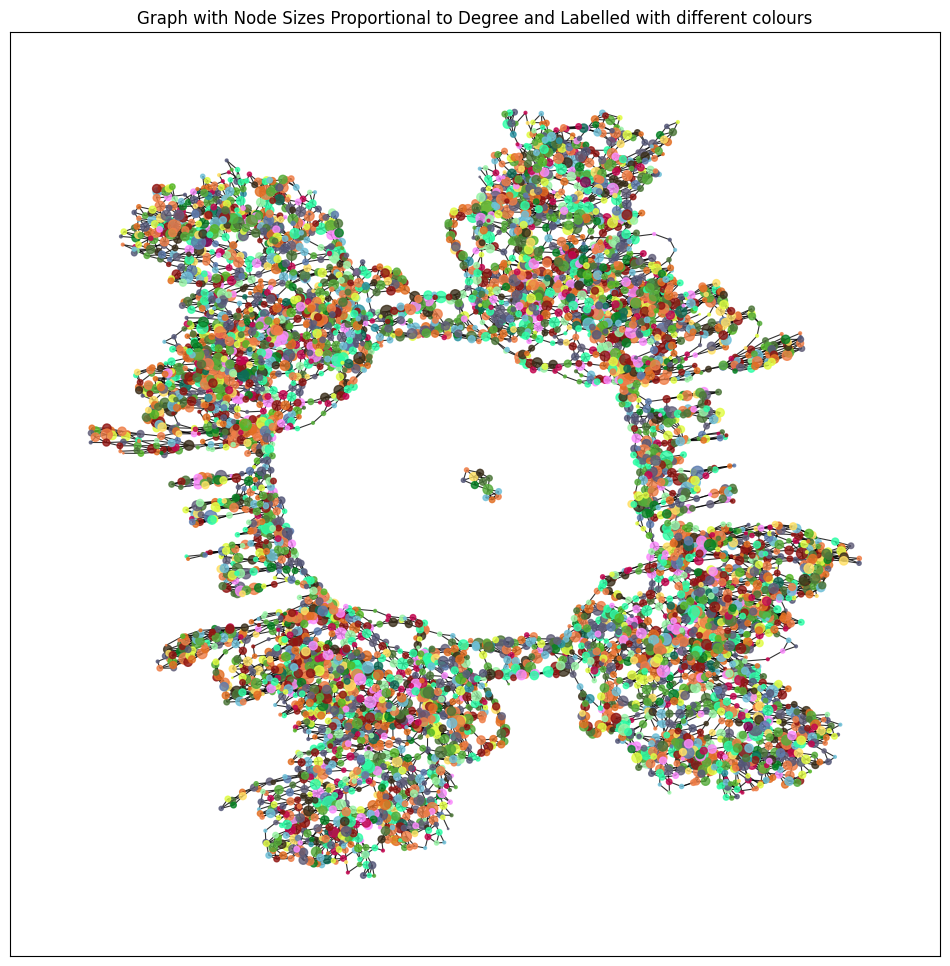

In [ ]:
#For the node sizes we square the degree values so that the difference between node sizes based on degree is evident.
#We can use other functions like cube etc.. as per choice.
#Color values are assigned for nodes based on the node label.
node_sizes = [v**2 for v in degrees.values()]
unique_labels = nodes_df['label'].unique()
label_to_color = {label: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for label in unique_labels}
colors = [label_to_color[G.nodes[node]["label"]] for node in G.nodes()]
plt.figure(figsize=(12, 12))
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, layout, node_size=node_sizes, node_color=colors, alpha=0.8)
nx.draw_networkx_edges(G, layout, width=0.8, alpha=0.8)

plt.title("Graph with Node Sizes Proportional to Degree and Labelled with different colours")
plt.show()
#See the graph the two connected components are separated out. One in the centre and the other in the outer layer.

In [ ]:
#Question 3; i and ii
#Now sorting in ascending order and creating a list dsorted_nodes. Finding and printing the bottom 10 % and top 5% nodes.
dsorted_nodes = sorted(degrees, key=degrees.get)
bottom_10_percent=int(len(dsorted_nodes)*0.1)
botton_10_percent_nodes= dsorted_nodes[:bottom_10_percent]
top_5_percent = int(len(sorted_nodes) * 0.05)
top_5_percent_nodes = sorted_nodes[:top_5_percent]

In [ ]:
print(" The Top 5% nodes based on degree:", top_5_percent_nodes)
print(" The Bottom 10% nodes based on degree:", botton_10_percent_nodes)

 The Top 5% nodes based on degree: [106, 168, 782, 2336, 102, 203, 260, 426, 4120, 4121, 1405, 1937, 2306, 1059, 1209, 3342, 3556, 1802, 1424, 3465, 5371, 2955, 640, 135, 166, 169, 3277, 212, 1710, 4870, 2581, 287, 315, 561, 564, 2396, 479, 481, 4018, 628, 3444, 2960, 764, 1756, 783, 810, 844, 5086, 3750, 910, 2734, 947, 949, 971, 1938, 1939, 4828, 4695, 4552, 2298, 1263, 1264, 1265, 1432, 5518, 1512, 1616, 1310, 2408, 1348, 2789, 1775, 2778, 1668, 1844, 1911, 1941, 2983, 2242, 4731, 3605, 4781, 37, 42, 2062, 1700, 103, 107, 641, 2771, 1690, 4879, 114, 4649, 1087, 3046, 131, 917, 167, 183, 2725, 4433, 3264, 201, 200, 4178, 204, 208, 2425, 214, 2832, 238, 2271, 3017, 1367, 2548, 2582, 440, 314, 4007, 1795, 348, 1392, 366, 393, 3489, 407, 409, 412, 2437, 483, 2787, 3970, 1729, 1731, 2063, 510, 1511, 516, 1883, 556, 588, 3516, 2675, 5335, 633, 651, 650, 653, 676, 3152, 1118, 1156, 762, 1458, 3299, 781, 886, 3200, 1403, 5390, 4149, 848, 2596, 2492, 864, 867, 869, 871, 878, 879, 4655, 2478,

In [ ]:
#Finding the number of bottom 10% nodes
len(botton_10_percent_nodes)

574

In [ ]:
#Finding the number of top 5% nodes
len(top_5_percent_nodes)

287

In [ ]:
#Creating subgraphs for top 5% and bottom 10% for effective visualization.
subgraph_top = G.subgraph(top_5_percent_nodes)
subgraph_bottom = G.subgraph(botton_10_percent_nodes)

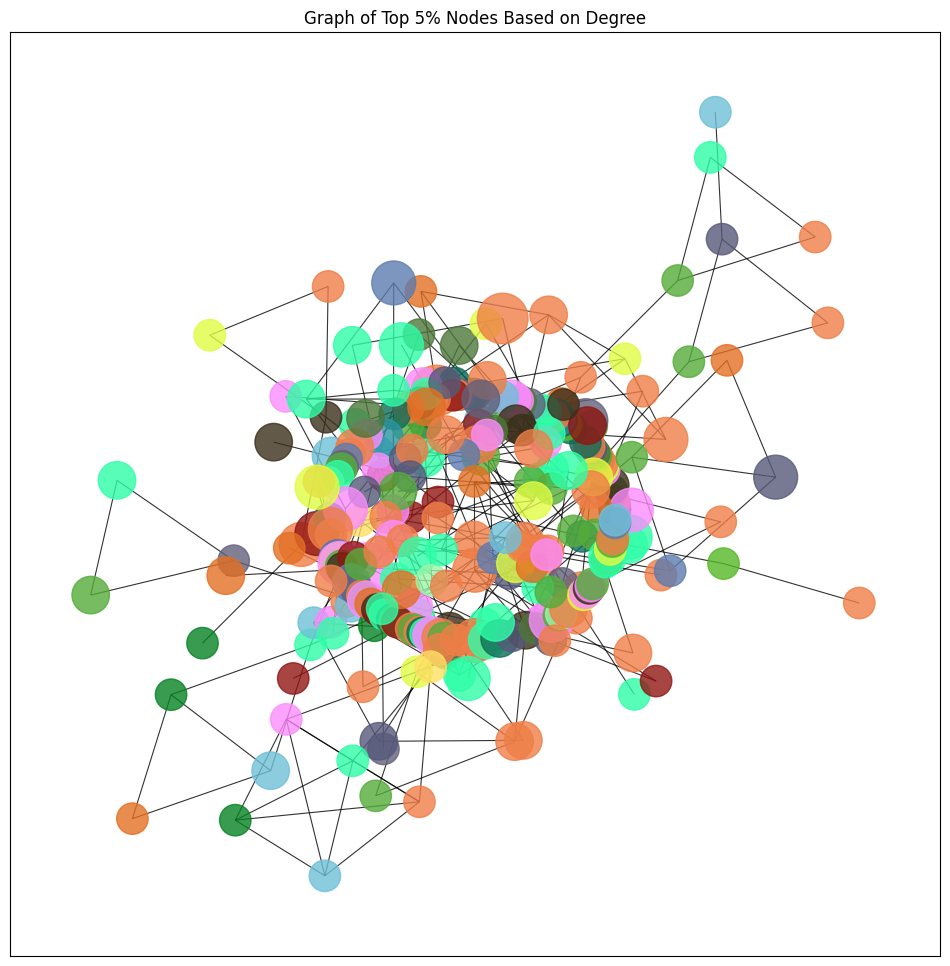

In [ ]:
#Visualization of top 5% nodes
node_sizes = [degrees[node] **3 for node in subgraph_top.nodes()]
#unique_labels = nodes_df['label'].unique() @Defined earlier
#label_to_color = {label: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for label in unique_labels} @Defined earlier
colors = [label_to_color[subgraph_top.nodes[node]["label"]] for node in subgraph_top.nodes()]
#colors = ["#{:06x}".format(random.randint(0, 0xFFFFFF)) for i in range(len(subgraph_top.nodes()))] @if we want to assign node colors randomly
plt.figure(figsize=(12, 12))
lab = nx.kamada_kawai_layout(subgraph_top)
nx.draw_networkx_nodes(subgraph_top, lab, node_size=node_sizes, node_color=colors, alpha=0.8)
nx.draw_networkx_edges(subgraph_top, lab, width=0.8, alpha=0.8)
plt.title("Graph of Top 5% Nodes Based on Degree")
plt.show()

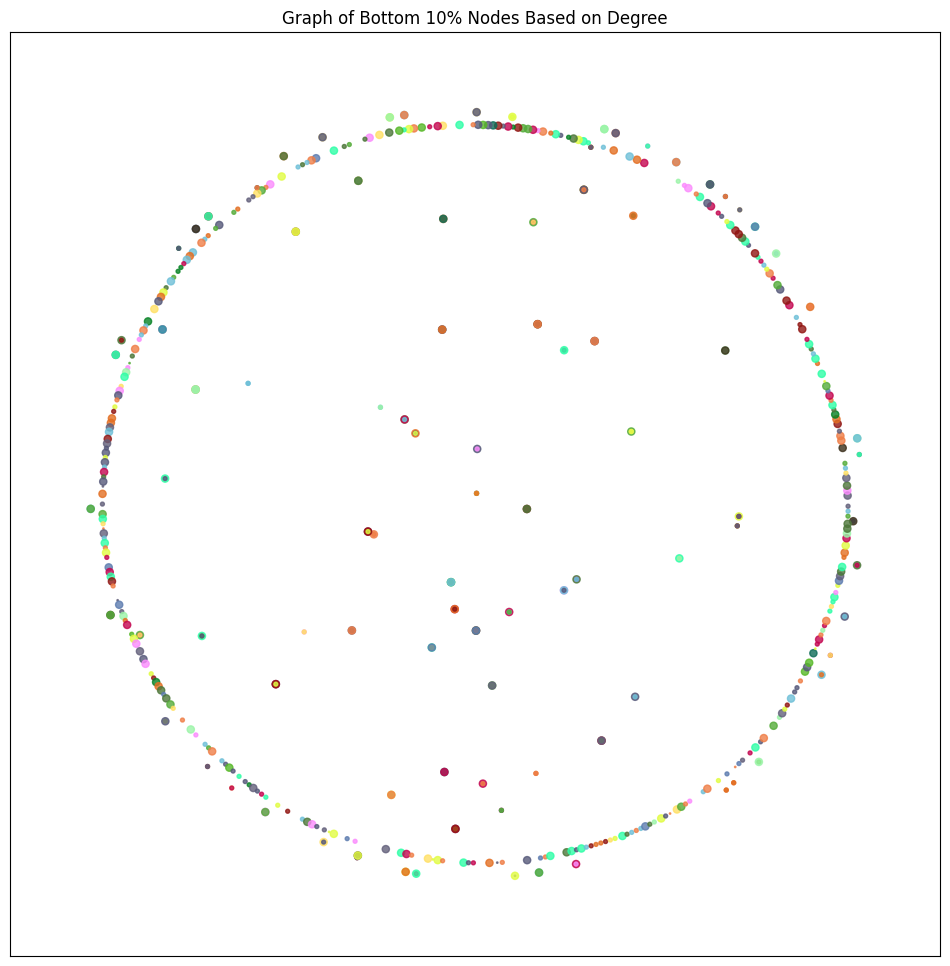

In [ ]:
#Visualization of bottom 10% nodes.
node_sizes = [degrees[node] **3 for node in subgraph_bottom.nodes()]
colors = [label_to_color[subgraph_bottom.nodes[node]["label"]] for node in subgraph_bottom.nodes()]
plt.figure(figsize=(12, 12))
lab = nx.kamada_kawai_layout(subgraph_bottom)
nx.draw_networkx_nodes(subgraph_bottom, lab, node_size=node_sizes, node_color=colors, alpha=0.8)
nx.draw_networkx_edges(subgraph_bottom, lab, width=0.8, alpha=0.8)
plt.title("Graph of Bottom 10% Nodes Based on Degree")
plt.show()

In [ ]:
#Question 4 ; i and ii
#Finding the connected components in the graph
components = list(nx.connected_components(G))
print("Connected components:", components)

Connected components: [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,

In [ ]:
#AS visualized earlier in the plot titled "Graph with Node Sizes Proportional to Degree and Labelled with different colours".
#there are 2 connected components.
len(components)

2

In [ ]:
#The two connected components are broken into subgraphs. Their respective nodes and edges are printed.
subgraphs = [G.subgraph(c).copy() for c in nx.connected_components(G)]
for i, sg in enumerate(subgraphs):
    print(f"Subgraph {i+1}: Nodes = {sg.nodes()}, Edges = {sg.edges()}")

Subgraph 1: Nodes = [2, 1, 3, 267, 1685, 4323, 4, 5, 1936, 3794, 1530, 4978, 4979, 7, 6, 10, 12, 903, 8, 9, 11, 13, 1501, 286, 1742, 15, 14, 16, 17, 18, 19, 590, 591, 2828, 2829, 4984, 4985, 592, 5482, 2115, 2116, 2117, 4804, 1131, 21, 20, 388, 389, 4544, 22, 23, 24, 81, 1543, 3107, 3108, 3110, 3576, 5188, 25, 1540, 5703, 5704, 3929, 27, 26, 28, 2954, 3713, 3868, 4618, 29, 30, 31, 32, 33, 2955, 3714, 1189, 1190, 5269, 35, 34, 36, 37, 39, 40, 41, 38, 3636, 3637, 3379, 3638, 3482, 3483, 3484, 43, 42, 44, 45, 46, 47, 48, 49, 50, 2003, 3528, 5468, 396, 397, 398, 1459, 1460, 1461, 52, 51, 53, 4092, 4094, 4095, 4096, 54, 55, 56, 1159, 239, 3557, 58, 57, 59, 60, 61, 4451, 4452, 4453, 63, 62, 65, 66, 67, 899, 64, 68, 961, 5612, 4665, 5350, 2069, 2070, 2071, 70, 69, 71, 72, 75, 3056, 3059, 73, 74, 76, 5625, 2187, 2062, 2350, 78, 77, 79, 80, 82, 1274, 3696, 4352, 2342, 3699, 1183, 1301, 3792, 4224, 5234, 4812, 5593, 84, 83, 85, 86, 87, 88, 610, 1001, 4892, 2336, 2337, 3969, 3971, 90, 89, 92, 93,

In [ ]:
#The nodes of Giant component is printed.
largest_cc = max(nx.connected_components(G), key=len)
print("Largest connected component:", largest_cc)

Largest connected component: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

In [ ]:
#Length of the giant component is printed, which is same as calculated by Gephi.
len(largest_cc)

5736